# Machine Learning Advanced - Assignement

## " Market Basket Analysis "

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

### Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np

import networkx as nx

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:
df = pd.read_csv('groceries.csv')
print('Data Shape:', df.shape)
df.head()

Data Shape: (9834, 32)


,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
count,9834,7675,6032,4733,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,152,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,female sanitary products,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [4]:

# 1. Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, df.shape[0]):
    for j in range(0, df.shape[1]):
        transaction.append(df.values[i,j])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

# 3. Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

# 5. Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Blues')


,items,incident_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [5]:
# 1. Gather Only First Choice of Each Transactions into Numpy Array
# Similar Pattern to Above, Only Change is the Column Number "0" in Append Function
transaction = []
for i in range(0, df.shape[0]):
    transaction.append(df.values[i,0])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

# 3. Delete NaN Items from Dataset
indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["food"] = "food"
df_table_first = df_table_first.truncate(before=-1, after=15) # Fist 15 Choice

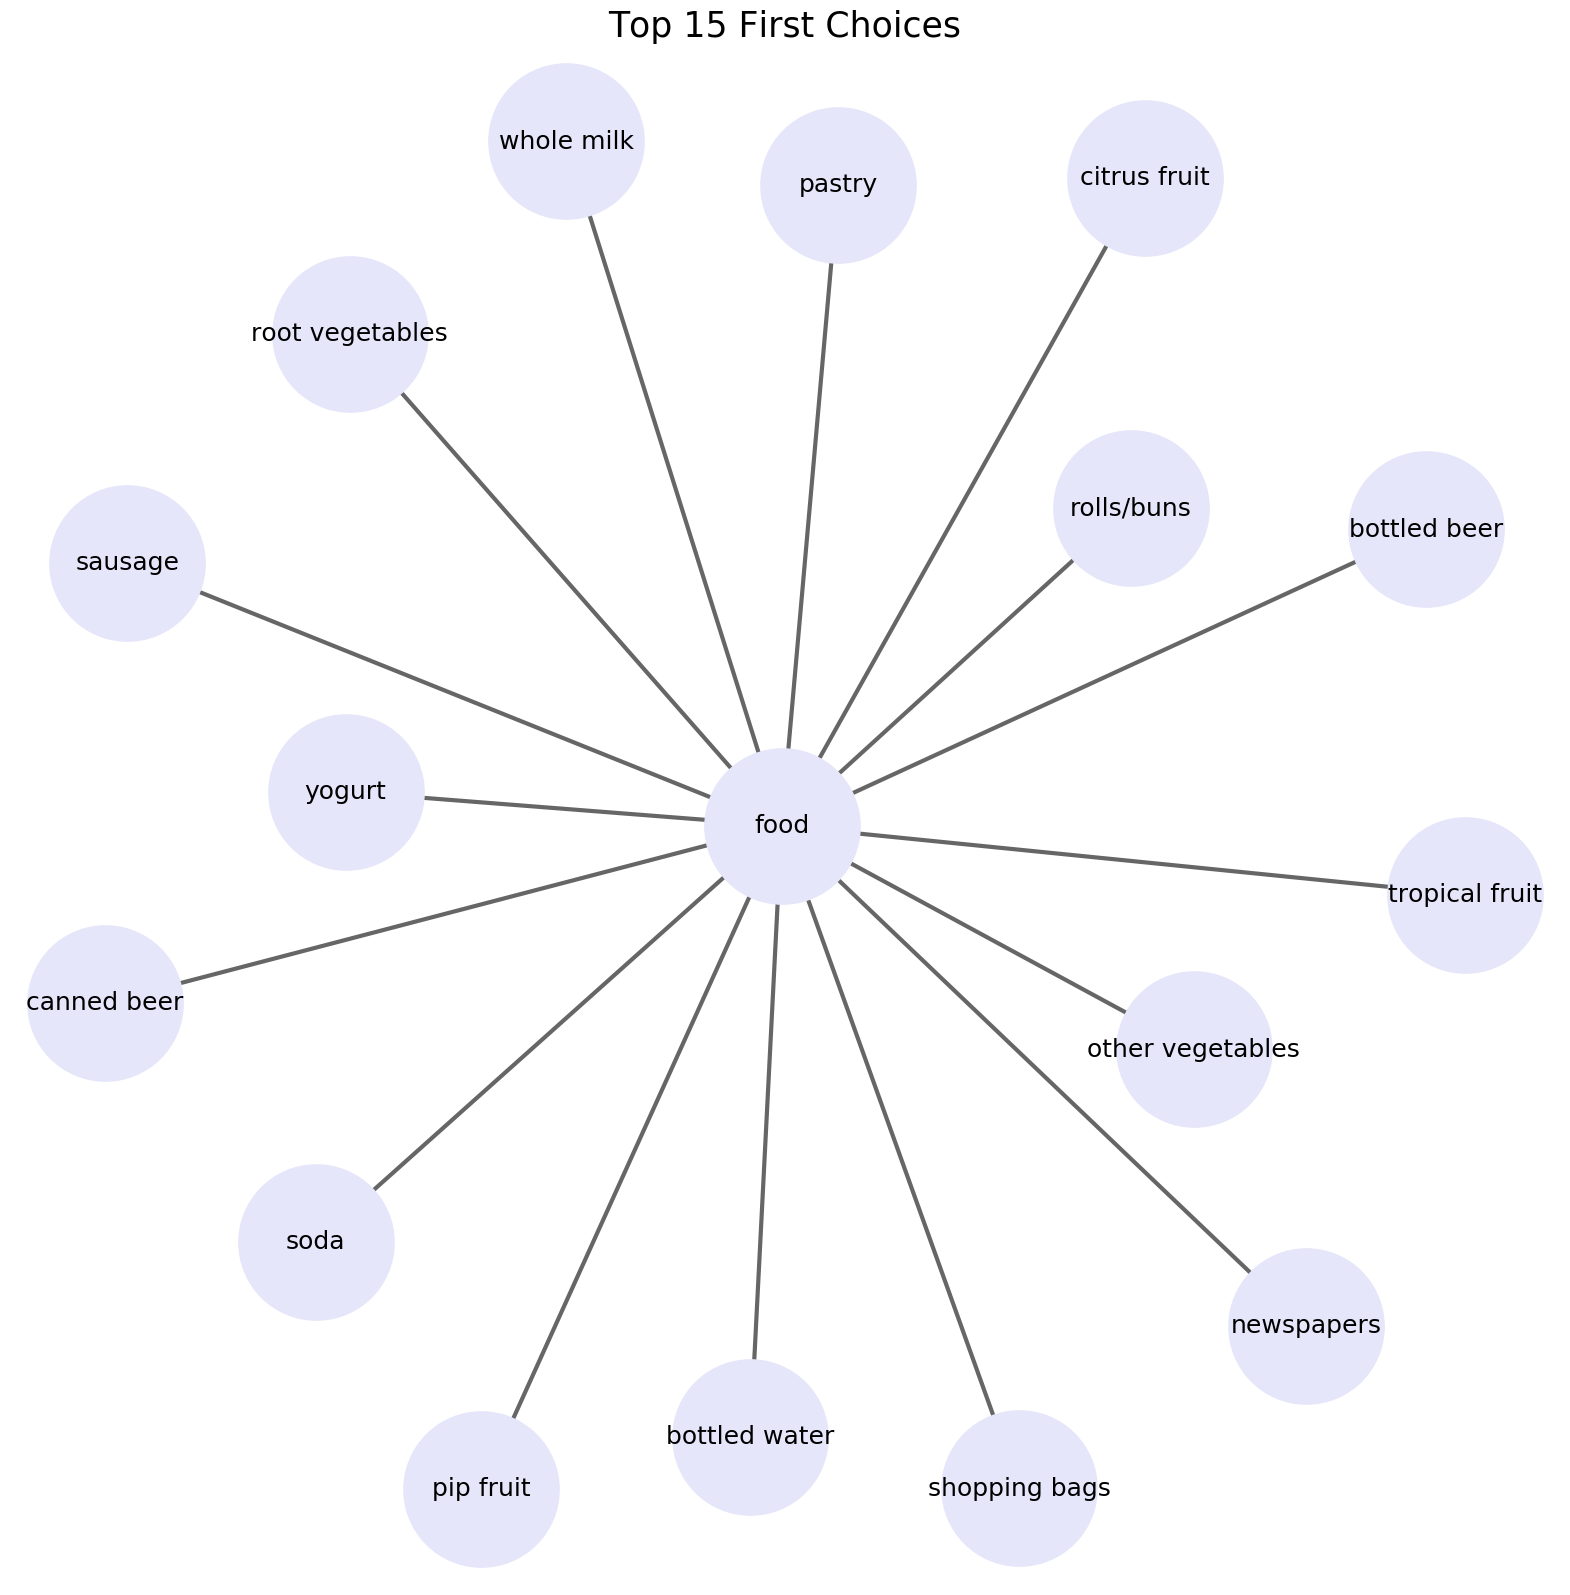

In [6]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'food', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 25)
plt.show()

In [5]:
# replace all the nan values with '' and inplace=True to commit the changes into the dataframe
df.fillna('',axis=1,inplace=True)
df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,,,,,,,,...,,,,,,,,,,
1,whole milk,,,,,,,,,,...,,,,,,,,,,
2,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,...,,,,,,,,,,
3,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,...,,,,,,,,,,
4,whole milk,butter,yogurt,rice,abrasive cleaner,,,,,,...,,,,,,,,,,


In [6]:
# convert the dataframe into a list of list where each inner list represents a transaction.

df_list = df.to_numpy().tolist()
df_list
dataset = list()
for i in range(len(df_list)) :
    item = list()
    for j in df_list[i] :
        if pd.notna(j):
            item.append(j)
    dataset.append(item)

In [7]:
# Create an instace of our TransactionEncoder cabslass 
te = TransactionEncoder()
# Fit and transform our dataset which is a list of lists into an array of True and False.
te_array = te.fit(dataset).transform(dataset)
te_array

array([[ True, False, False, ..., False,  True, False],
       [ True, False, False, ...,  True, False, False],
       [ True, False, False, ..., False,  True, False],
       ...,
       [ True, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [8]:
# Convert this into a dataframe for better visualisation and for applying association rules onto the dataframe.

final_df = pd.DataFrame(te_array,columns=te.columns_)
# remove the first column as it does not contain any infomation
final_df.drop(columns=[''],axis=1,inplace=True)
final_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Convert dataset into 1-0 encoding

def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = final_df.applymap(encode_units)
dataset.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Algorithm Implementation - Apriori Algorithm

In [14]:
# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


,support,itemsets,length
0,0.033455,(UHT-milk),1
1,0.017694,(baking powder),1
2,0.052471,(beef),1
3,0.033252,(berries),1
4,0.026032,(beverages),1
...,...,...,...
328,0.011999,"(tropical fruit, whole milk, root vegetables)",3
329,0.014541,"(yogurt, whole milk, root vegetables)",3
330,0.010474,"(whole milk, soda, yogurt)",3
331,0.015152,"(tropical fruit, whole milk, yogurt)",3


In [15]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
239,0.074842,"(whole milk, other vegetables)",2
267,0.056640,"(rolls/buns, whole milk)",2
300,0.056030,"(whole milk, yogurt)",2


In [16]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
301,0.010779,"(bottled water, whole milk, other vegetables)",3
302,0.011491,"(butter, whole milk, other vegetables)",3
303,0.010372,"(citrus fruit, other vegetables, root vegetables)",3
304,0.013016,"(whole milk, citrus fruit, other vegetables)",3
305,0.010270,"(whole milk, citrus fruit, yogurt)",3


In [17]:
# We can create our rules by defining metric and its threshold.

# For a start, 
#      We set our metric as "Lift" to define whether antecedents & consequents are dependent our not.
#      Treshold is selected as "1.2" since it is required to have lift scores above than 1 if there is dependency.

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
377,(curd),"(whole milk, yogurt)",0.053285,0.056030,0.010067,0.188931,3.371961,0.007082,1.163859,1,2
376,"(whole milk, yogurt)",(curd),0.056030,0.053285,0.010067,0.179673,3.371961,0.007082,1.154071,2,1
361,(root vegetables),"(other vegetables, citrus fruit)",0.109010,0.028879,0.010372,0.095149,3.294710,0.007224,1.073238,1,2
356,"(other vegetables, citrus fruit)",(root vegetables),0.028879,0.109010,0.010372,0.359155,3.294710,0.007224,1.390337,2,1
476,"(yogurt, other vegetables)",(whipped/sour cream),0.043421,0.071690,0.010169,0.234192,3.266730,0.007056,1.212197,2,1
...,...,...,...,...,...,...,...,...,...,...,...
288,(rolls/buns),(root vegetables),0.183954,0.109010,0.024303,0.132117,1.211978,0.004251,1.026625,1,1
18,(bottled beer),(soda),0.080537,0.174395,0.016982,0.210859,1.209086,0.002937,1.046207,1,1
19,(soda),(bottled beer),0.174395,0.080537,0.016982,0.097376,1.209086,0.002937,1.018656,1,1
294,(rolls/buns),(whole milk),0.183954,0.255542,0.056640,0.307905,1.204909,0.009632,1.075659,1,1


In [18]:
# Sort values based on confidence

rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
357,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012,2,1
429,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197,2,1
375,"(curd, yogurt)",(whole milk),0.017287,0.255542,0.010067,0.582353,2.278893,0.005650,1.782505,2,1
351,"(butter, other vegetables)",(whole milk),0.020033,0.255542,0.011491,0.573604,2.244657,0.006372,1.745931,2,1
505,"(tropical fruit, root vegetables)",(whole milk),0.021049,0.255542,0.011999,0.570048,2.230742,0.006620,1.731492,2,1
...,...,...,...,...,...,...,...,...,...,...,...
371,(whole milk),"(yogurt, citrus fruit)",0.255542,0.021660,0.010270,0.040191,1.855579,0.004736,1.019307,1,2
408,(whole milk),"(pork, other vegetables)",0.255542,0.021660,0.010169,0.039793,1.837207,0.004634,1.018885,1,2
450,(whole milk),"(sausage, other vegetables)",0.255542,0.026947,0.010169,0.039793,1.476699,0.003283,1.013378,1,2
183,(whole milk),(hard cheese),0.255542,0.024507,0.010067,0.039395,1.607518,0.003805,1.015499,1,1


In [19]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) & 
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
357,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012,2,1
429,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197,2,1
375,"(curd, yogurt)",(whole milk),0.017287,0.255542,0.010067,0.582353,2.278893,0.005650,1.782505,2,1
351,"(butter, other vegetables)",(whole milk),0.020033,0.255542,0.011491,0.573604,2.244657,0.006372,1.745931,2,1
505,"(tropical fruit, root vegetables)",(whole milk),0.021049,0.255542,0.011999,0.570048,2.230742,0.006620,1.731492,2,1
511,"(root vegetables, yogurt)",(whole milk),0.025829,0.255542,0.014541,0.562992,2.203130,0.007941,1.703535,2,1
382,"(domestic eggs, other vegetables)",(whole milk),0.022270,0.255542,0.012304,0.552511,2.162116,0.006613,1.663636,2,1
527,"(whipped/sour cream, yogurt)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,0.005580,1.565664,2,1
487,"(rolls/buns, root vegetables)",(whole milk),0.024303,0.255542,0.012711,0.523013,2.046679,0.006500,1.560750,2,1
399,"(pip fruit, other vegetables)",(whole milk),0.026134,0.255542,0.013525,0.517510,2.025146,0.006846,1.542949,2,1


In [20]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
351,"(butter, other vegetables)",(whole milk),0.020033,0.255542,0.011491,0.573604,2.244657,0.006372,1.745931,2,1
357,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012,2,1
375,"(curd, yogurt)",(whole milk),0.017287,0.255542,0.010067,0.582353,2.278893,0.005650,1.782505,2,1
382,"(domestic eggs, other vegetables)",(whole milk),0.022270,0.255542,0.012304,0.552511,2.162116,0.006613,1.663636,2,1
429,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197,2,1


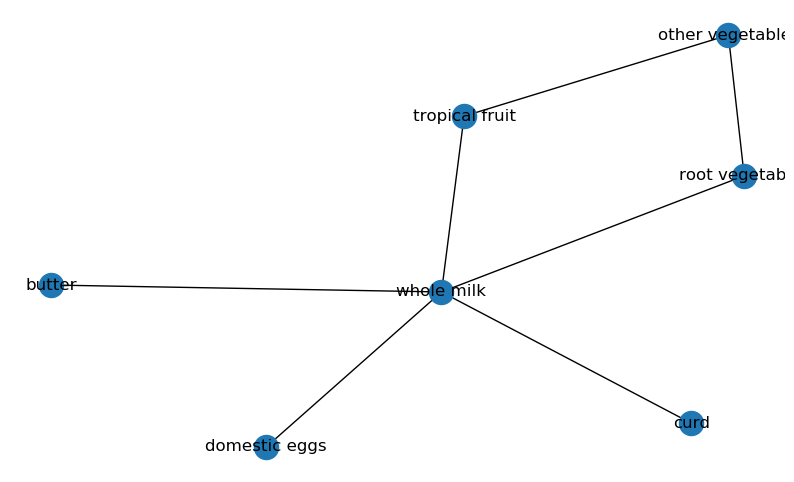

In [21]:
import networkx as nx
rules.antecedents  =  rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents  =  rules.consequents.apply(lambda x: next(iter(x)))
fig, ax = plt.subplots(figsize = (10,6))
GA = nx.from_pandas_edgelist(rules,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)

### Conclusion :

Whole Milk is the best seller (high demand) and it shows association with 6 items- Butter, Curd, Domestic Eggs, Tropical Fruit, Root Vegetable and Other Vegetables. There are a couple of strategies that the store can adopt to increase its sales considering the association we have seen between Whole Milk and its 6 partners